In [1]:
%matplotlib inline

import calendar
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

df_acc = pd.read_csv('../Road/src/data_sets/Accidents_2015.csv',
                     dtype={'Accident_Index': str}, na_values=-1)  # Read accidents data

# Read meta data
df_meta = pd.read_excel('../Road/src/data_sets/Road-Accident-Safety-Data-Guide.xls',
                        ['Accident Severity', 'Road Type', 'Junction Detail',
                         'Junction Control', 'Light Conditions', 'Weather', 'Road Surface',
                         'Special Conditions at Site', 'Carriageway Hazards', 'Urban Rural'])

In [2]:
# Reformat date and time
df_acc['Date_Time'] = pd.to_datetime(df_acc['Date'] + ' ' + df_acc['Time'], dayfirst=True)
df_acc['Date'] = df_acc['Date_Time'].dt.date
df_acc['Year'] = df_acc['Date_Time'].dt.year
df_acc['Month'] = df_acc['Date_Time'].dt.month
df_acc['Day'] = df_acc['Date_Time'].dt.day
df_acc['Day_of_Week'] = df_acc['Date_Time'].dt.dayofweek
df_acc['Hour'] = df_acc['Date_Time'].dt.hour
df_acc['Minute'] = df_acc['Date_Time'].dt.minute

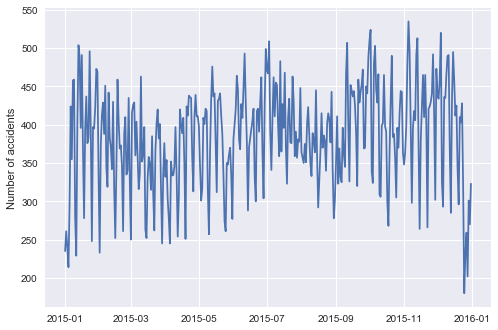

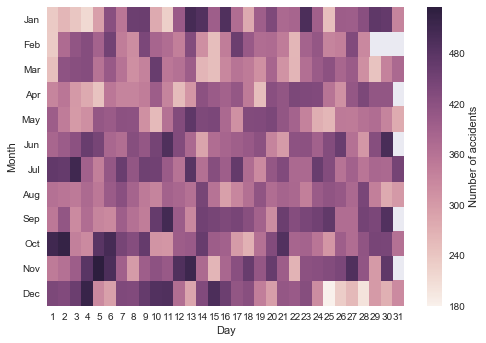

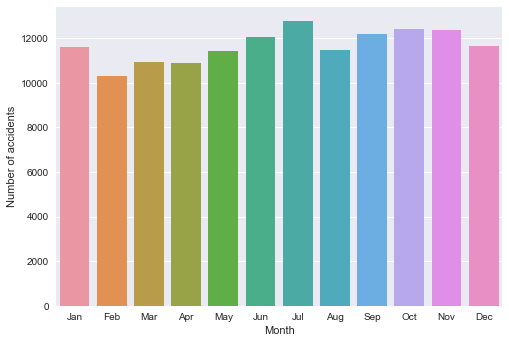

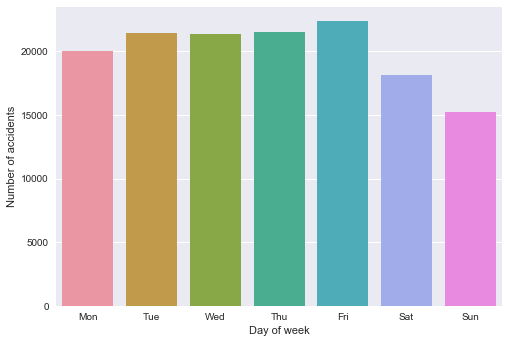

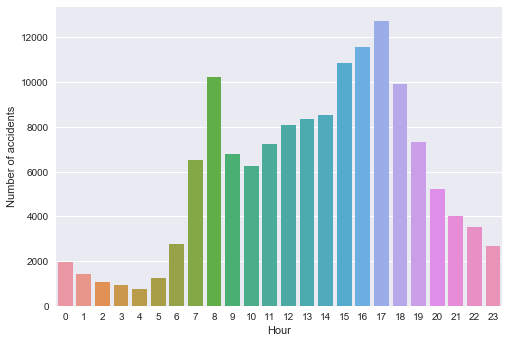

In [3]:
# Plot number of accidents by date
df_acc_date = df_acc.groupby('Date').count()
fig_acc_date, ax_acc_date = plt.subplots()
ax_acc_date.plot(df_acc_date['Accident_Index'])
ax_acc_date.set_ylabel('Number of accidents')

# Plot number of accidents by month and day
df_acc_month_day = df_acc.groupby(['Month', 'Day']).count().unstack()
fig_acc_month_day, ax_acc_month_day = plt.subplots()
sns.heatmap(df_acc_month_day['Accident_Index'], ax=ax_acc_month_day)
ax_acc_month_day.set_xticklabels(np.arange(1, 32), rotation=0)
ax_acc_month_day.set_yticklabels(calendar.month_abbr[13:0:-1], rotation=0)
ax_acc_month_day.collections[0].colorbar.set_label('Number of accidents')

# Plot number of accidents by month
fig_acc_month, ax_acc_month = plt.subplots()
sns.countplot('Month', data=df_acc, ax=ax_acc_month)
ax_acc_month.set_ylabel('Number of accidents')
ax_acc_month.set_xticklabels(calendar.month_abbr[1:13])

# Plot number of accidents by day of week
fig_acc_day_of_week, ax_acc_day_of_week = plt.subplots()
sns.countplot('Day_of_Week', data=df_acc, ax=ax_acc_day_of_week)
ax_acc_day_of_week.set_xlabel('Day of week')
ax_acc_day_of_week.set_ylabel('Number of accidents')
ax_acc_day_of_week.set_xticklabels(calendar.day_abbr[0:7])

# Plot number of accidents by hour
fig_acc_hour, ax_acc_hour = plt.subplots()
sns.countplot('Hour', data=df_acc, ax=ax_acc_hour)
ax_acc_hour.set_ylabel('Number of accidents')
ax_acc_hour.set_xticklabels(np.arange(24))

plt.show()

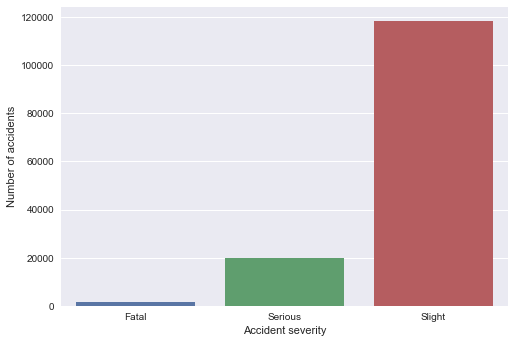

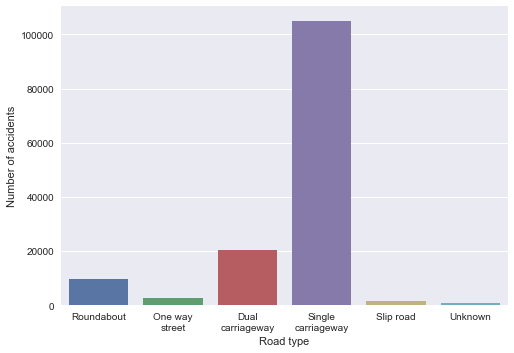

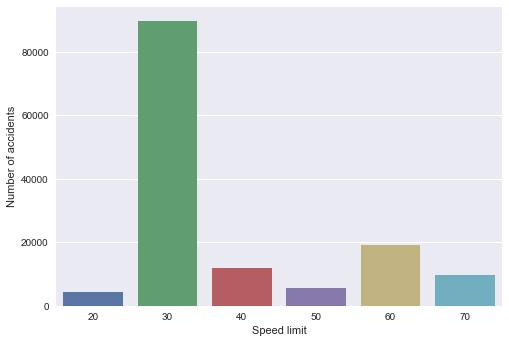

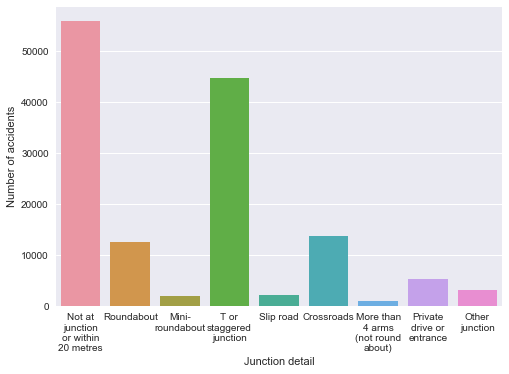

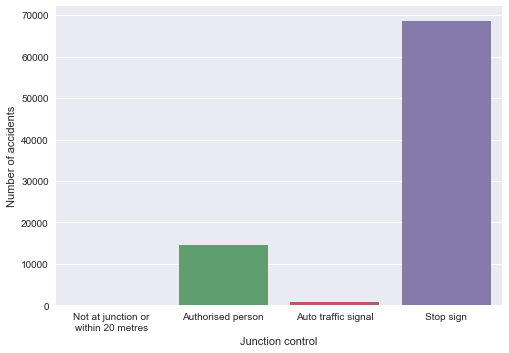

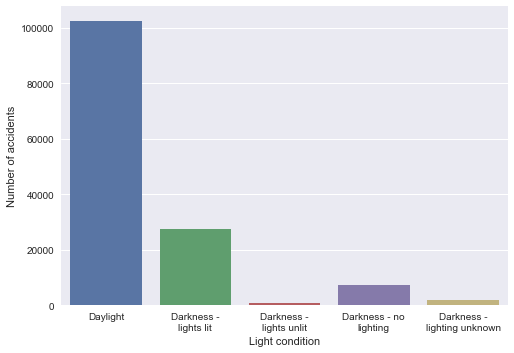

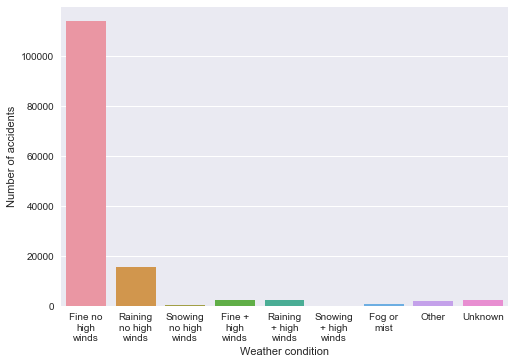

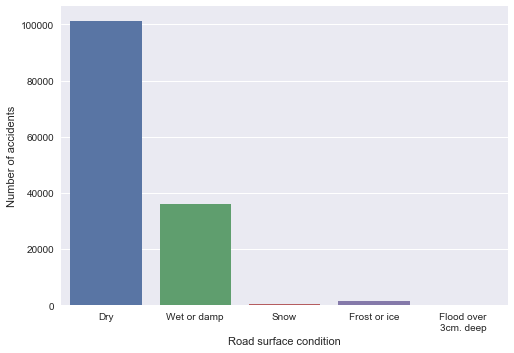

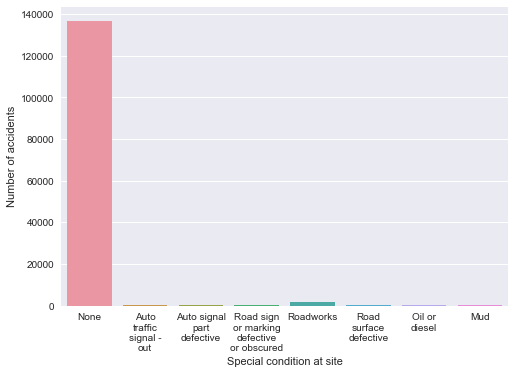

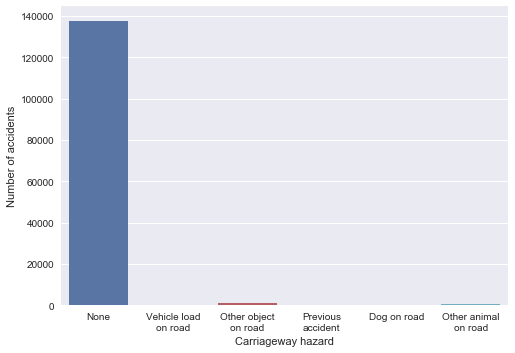

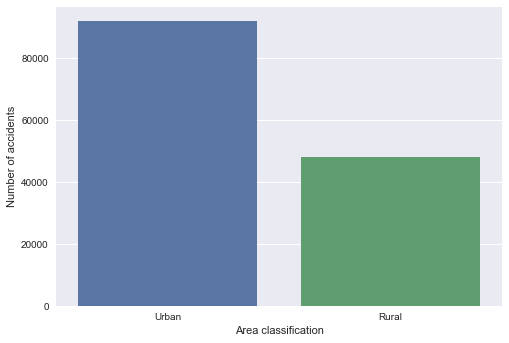

In [4]:
# Plot number of accidents by accident severity
fig_acc_severity, ax_acc_severity = plt.subplots()
sns.countplot('Accident_Severity', data=df_acc, ax=ax_acc_severity)
ax_acc_severity.set_xlabel('Accident severity')
ax_acc_severity.set_ylabel('Number of accidents')
ax_acc_severity.set_xticklabels(df_meta['Accident Severity']['label'])

# Plot number of accidents by road type
fig_acc_road_type, ax_acc_road_type = plt.subplots()
sns.countplot('Road_Type', data=df_acc, ax=ax_acc_road_type)
ax_acc_road_type.set_xlabel('Road type')
ax_acc_road_type.set_ylabel('Number of accidents')
ax_acc_road_type.set_xticklabels(df_meta['Road Type']['label'][:-1].str.wrap(11))

# Plot number of accidents by speed limit
fig_acc_speed, ax_acc_speed = plt.subplots()
sns.countplot('Speed_limit', data=df_acc[df_acc['Speed_limit'] >= 20], ax=ax_acc_speed)
ax_acc_speed.set_xlabel('Speed limit')
ax_acc_speed.set_ylabel('Number of accidents')

# Plot number of accidents by junction detail
fig_acc_junction_detail, ax_acc_junction_detail = plt.subplots()
sns.countplot('Junction_Detail', data=df_acc, ax=ax_acc_junction_detail)
ax_acc_junction_detail.set_xlabel('Junction detail')
ax_acc_junction_detail.set_ylabel('Number of accidents')
ax_acc_junction_detail.set_xticklabels(df_meta['Junction Detail']['label'][:-1].str.wrap(10))

# Plot number of accidents by junction control
fig_acc_junction_control, ax_acc_junction_control = plt.subplots()
sns.countplot('Junction_Control', data=df_acc, ax=ax_acc_junction_control)
ax_acc_junction_control.set_xlabel('Junction control')
ax_acc_junction_control.set_ylabel('Number of accidents')
ax_acc_junction_control.set_xticklabels(df_meta['Junction Control']['label'][:-1].str
                                        .wrap(19))

# Plot number of accidents by light condition
fig_acc_light, ax_acc_light = plt.subplots()
sns.countplot('Light_Conditions', data=df_acc, ax=ax_acc_light)
ax_acc_light.set_xlabel('Light condition')
ax_acc_light.set_ylabel('Number of accidents')
ax_acc_light.set_xticklabels(df_meta['Light Conditions']['label'][:-1].str.wrap(16))

# Plot number of accidents by weather condition
fig_acc_weather, ax_acc_weather = plt.subplots()
sns.countplot('Weather_Conditions', data=df_acc, ax=ax_acc_weather)
ax_acc_weather.set_xlabel('Weather condition')
ax_acc_weather.set_ylabel('Number of accidents')
ax_acc_weather.set_xticklabels(df_meta['Weather']['label'][:-1].str.wrap(8))

# Plot number of accidents by road surface condition
fig_acc_road_surface, ax_acc_road_surface = plt.subplots()
sns.countplot('Road_Surface_Conditions', data=df_acc, ax=ax_acc_road_surface)
ax_acc_road_surface.set_xlabel('Road surface condition')
ax_acc_road_surface.set_ylabel('Number of accidents')
ax_acc_road_surface.set_xticklabels(df_meta['Road Surface']['label'][:-1].str.wrap(12))

# Plot number of accidents by special condition at site
fig_acc_special, ax_acc_special = plt.subplots()
sns.countplot('Special_Conditions_at_Site', data=df_acc, ax=ax_acc_special)
ax_acc_special.set_xlabel('Special condition at site')
ax_acc_special.set_ylabel('Number of accidents')
ax_acc_special.set_xticklabels(df_meta['Special Conditions at Site']['label'][:-1].str
                               .wrap(11))

# Plot number of accidents by carriageway hazard
fig_acc_carriageway, ax_acc_carriageway = plt.subplots()
sns.countplot('Carriageway_Hazards', data=df_acc, ax=ax_acc_carriageway)
ax_acc_carriageway.set_xlabel('Carriageway hazard')
ax_acc_carriageway.set_ylabel('Number of accidents')
ax_acc_carriageway.set_xticklabels(df_meta['Carriageway Hazards']['label'][:-1].str.wrap(12))

# Plot number of accidents by area classification
fig_acc_area, ax_acc_area = plt.subplots()
sns.countplot('Urban_or_Rural_Area', data=df_acc, ax=ax_acc_area)
ax_acc_area.set_xlabel('Area classification')
ax_acc_area.set_ylabel('Number of accidents')
ax_acc_area.set_xticklabels(df_meta['Urban Rural']['label'][:-1])

plt.show()

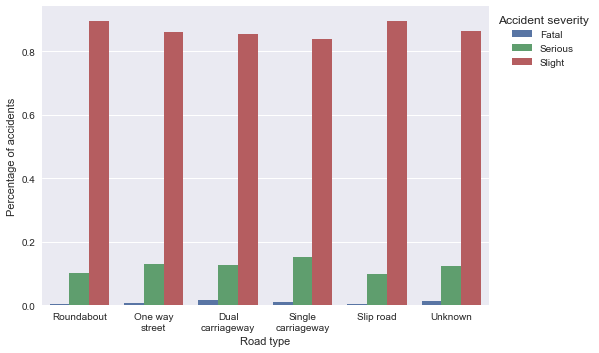

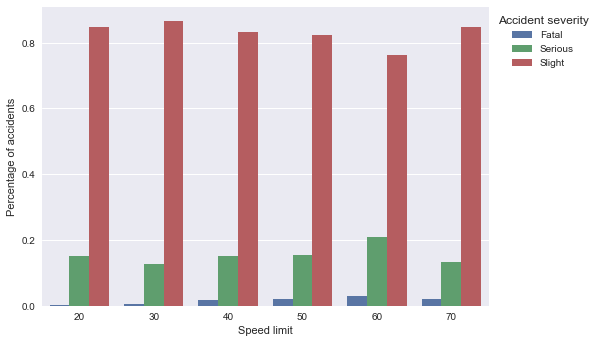

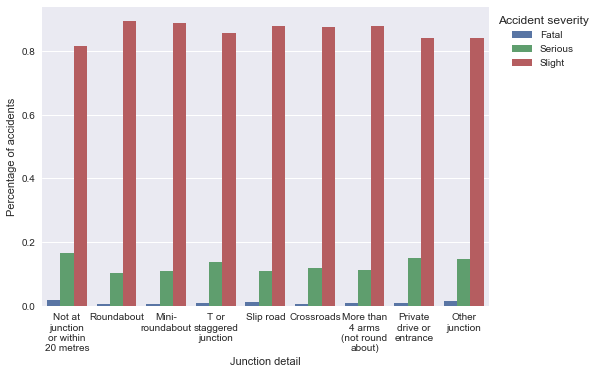

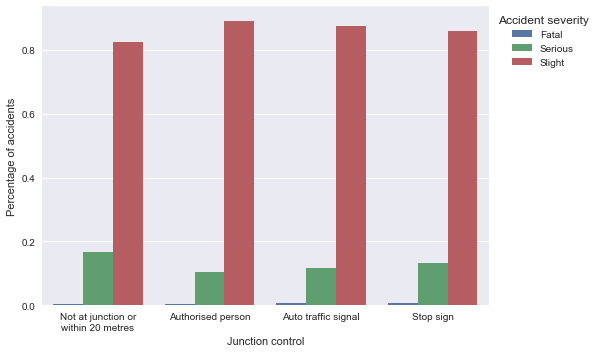

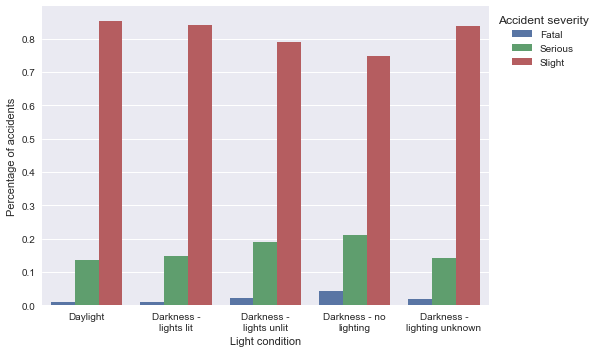

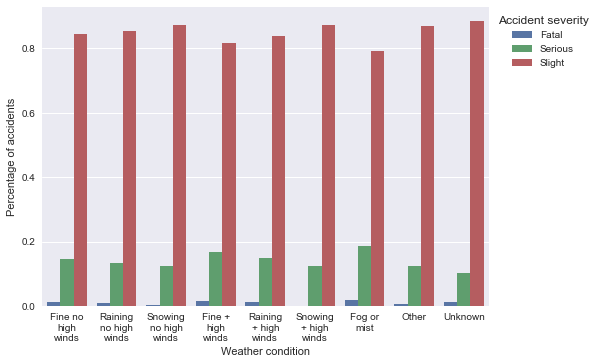

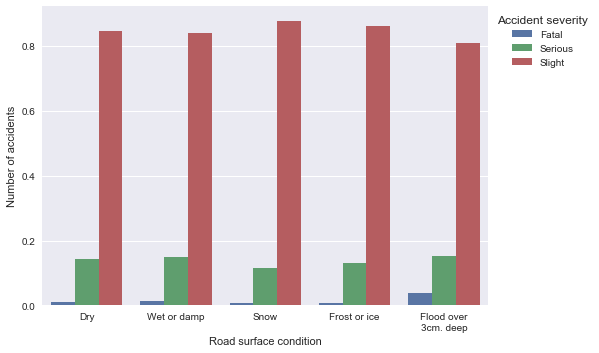

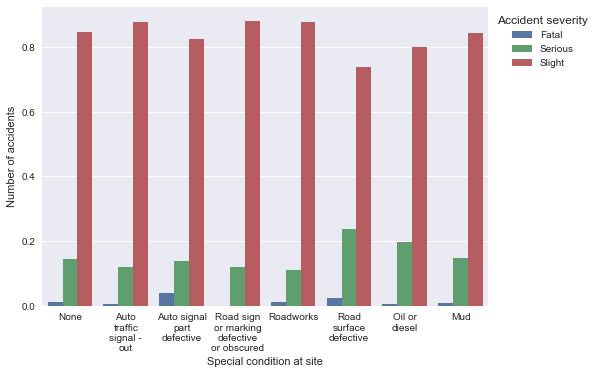

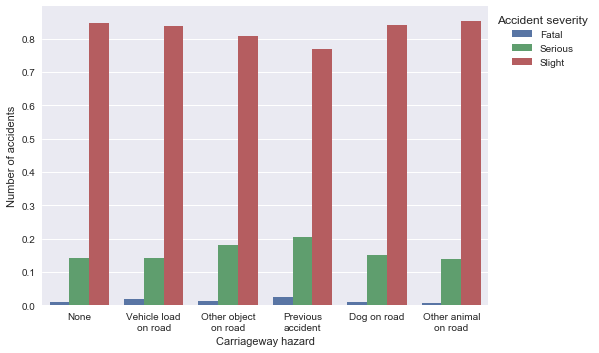

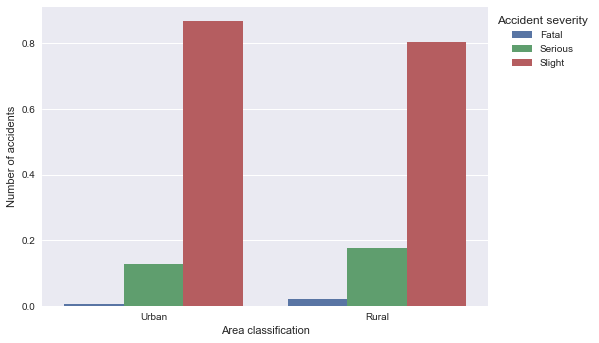

In [5]:
# Plot percentage of accident severity by road type
df_acc_road_type_per = df_acc.groupby('Road_Type')['Accident_Severity']\
    .value_counts(True).reset_index(name='Percentage')
fig_acc_road_type_per, ax_acc_road_type_per = plt.subplots()
sns.barplot('Road_Type', 'Percentage', 'Accident_Severity', df_acc_road_type_per, ci=None,
            ax=ax_acc_road_type_per)
ax_acc_road_type_per.set_xlabel('Road type')
ax_acc_road_type_per.set_ylabel('Percentage of accidents')
h_acc_road_type_per, l_acc_road_type_per = ax_acc_road_type_per.get_legend_handles_labels()
ax_acc_road_type_per.legend(h_acc_road_type_per, df_meta['Accident Severity']['label'],
                            loc='upper left', bbox_to_anchor=(1, 1),
                            title='Accident severity')
ax_acc_road_type_per.set_xticklabels(df_meta['Road Type']['label'][:-1].str.wrap(11))

# Plot percentage of accident severity by speed limit
df_acc_speed_per = df_acc.groupby('Speed_limit')['Accident_Severity'].value_counts(True)\
    .reset_index(name='Percentage')
fig_acc_speed_per, ax_acc_speed_per = plt.subplots()
sns.barplot('Speed_limit', 'Percentage', 'Accident_Severity',
            data=df_acc_speed_per[df_acc_speed_per['Speed_limit'] >= 20], ci=None,
            ax=ax_acc_speed_per)
ax_acc_speed_per.set_xlabel('Speed limit')
ax_acc_speed_per.set_ylabel('Percentage of accidents')
h_acc_speed_per, l_acc_speed_per = ax_acc_speed_per.get_legend_handles_labels()
ax_acc_speed_per.legend(h_acc_speed_per, df_meta['Accident Severity']['label'],
                        loc='upper left', bbox_to_anchor=(1, 1), title='Accident severity')

# Plot percentage of accident severity by junction detail
df_acc_junction_detail_per = df_acc.groupby('Junction_Detail')['Accident_Severity']\
    .value_counts(True).reset_index(name='Percentage')
fig_acc_junction_detail_per, ax_acc_junction_detail_per = plt.subplots()
sns.barplot('Junction_Detail', 'Percentage', 'Accident_Severity',
            data=df_acc_junction_detail_per, ci=None, ax=ax_acc_junction_detail_per)
ax_acc_junction_detail_per.set_xlabel('Junction detail')
ax_acc_junction_detail_per.set_ylabel('Percentage of accidents')
h_acc_junction_detail_per, l_acc_junction_detail_per = ax_acc_junction_detail_per.\
    get_legend_handles_labels()
ax_acc_junction_detail_per.legend(h_acc_junction_detail_per,
                                  df_meta['Accident Severity']['label'], loc='upper left',
                                  bbox_to_anchor=(1, 1), title='Accident severity')
ax_acc_junction_detail_per.set_xticklabels(df_meta['Junction Detail']['label'][:-1].str
                                           .wrap(10))

# Plot percentage of accident severity by junction control
df_acc_junction_control_per = df_acc.groupby('Junction_Control')['Accident_Severity']\
    .value_counts(True).reset_index(name='Percentage')
fig_acc_junction_control_per, ax_acc_junction_control_per = plt.subplots()
sns.barplot('Junction_Control', 'Percentage', 'Accident_Severity',
            data=df_acc_junction_control_per, ci=None, ax=ax_acc_junction_control_per)
ax_acc_junction_control_per.set_xlabel('Junction control')
ax_acc_junction_control_per.set_ylabel('Percentage of accidents')
h_acc_junction_control_per, l_acc_junction_control_per = ax_acc_junction_control_per.\
    get_legend_handles_labels()
ax_acc_junction_control_per.legend(h_acc_junction_control_per,
                                   df_meta['Accident Severity']['label'], loc='upper left',
                                   bbox_to_anchor=(1, 1), title='Accident severity')
ax_acc_junction_control_per.set_xticklabels(df_meta['Junction Control']['label'][:-1].str
                                            .wrap(19))

# Plot percentage of accident severity by light condition
df_acc_light_per = df_acc.groupby('Light_Conditions')['Accident_Severity']\
    .value_counts(True).reset_index(name='Percentage')
fig_acc_light_per, ax_acc_light_per = plt.subplots()
sns.barplot('Light_Conditions', 'Percentage', 'Accident_Severity', df_acc_light_per, ci=None,
            ax=ax_acc_light_per)
ax_acc_light_per.set_xlabel('Light condition')
ax_acc_light_per.set_ylabel('Percentage of accidents')
h_acc_light_per, l_acc_light_per = ax_acc_light_per.get_legend_handles_labels()
ax_acc_light_per.legend(h_acc_light_per, df_meta['Accident Severity']['label'],
                        loc='upper left', bbox_to_anchor=(1, 1), title='Accident severity')
ax_acc_light_per.set_xticklabels(df_meta['Light Conditions']['label'][:-1].str.wrap(16))

# Plot percentage of accident severity by weather condition
df_acc_weather_per = df_acc.groupby('Weather_Conditions')['Accident_Severity']\
    .value_counts(True).reset_index(name='Percentage')
fig_acc_weather_per, ax_acc_weather_per = plt.subplots()
sns.barplot('Weather_Conditions', 'Percentage', 'Accident_Severity', df_acc_weather_per,
            ci=None, ax=ax_acc_weather_per)
ax_acc_weather_per.set_xlabel('Weather condition')
ax_acc_weather_per.set_ylabel('Percentage of accidents')
h_acc_weather_per, l_acc_weather_per = ax_acc_light_per.get_legend_handles_labels()
ax_acc_weather_per.legend(h_acc_weather_per, df_meta['Accident Severity']['label'],
                          loc='upper left', bbox_to_anchor=(1, 1), title='Accident severity')
ax_acc_weather_per.set_xticklabels(df_meta['Weather']['label'][:-1].str.wrap(8))

# Plot percentage of accidents by road surface condition
df_acc_road_surface_per = df_acc.groupby('Road_Surface_Conditions')['Accident_Severity']\
    .value_counts(True).reset_index(name='Percentage')
fig_acc_road_surface_per, ax_acc_road_surface_per = plt.subplots()
sns.barplot('Road_Surface_Conditions', 'Percentage', 'Accident_Severity',
            data=df_acc_road_surface_per, ci=None, ax=ax_acc_road_surface_per)
ax_acc_road_surface_per.set_xlabel('Road surface condition')
ax_acc_road_surface_per.set_ylabel('Number of accidents')
h_acc_road_surface_per, l_acc_road_surface_per = ax_acc_road_surface_per\
    .get_legend_handles_labels()
ax_acc_road_surface_per.legend(h_acc_road_surface_per, df_meta['Accident Severity']['label'],
                               loc='upper left', bbox_to_anchor=(1, 1),
                               title='Accident severity')
ax_acc_road_surface_per.set_xticklabels(df_meta['Road Surface']['label'][:-1].str.wrap(12))

# Plot percentage of accidents by special condition at site
df_acc_special_per = df_acc.groupby('Special_Conditions_at_Site')['Accident_Severity']\
    .value_counts(True).reset_index(name='Percentage')
fig_acc_special_per, ax_acc_special_per = plt.subplots()
sns.barplot('Special_Conditions_at_Site', 'Percentage', 'Accident_Severity',
            data=df_acc_special_per, ci=None, ax=ax_acc_special_per)
ax_acc_special_per.set_xlabel('Special condition at site')
ax_acc_special_per.set_ylabel('Number of accidents')
h_acc_special_per, l_acc_special_per = ax_acc_special_per.get_legend_handles_labels()
ax_acc_special_per.legend(h_acc_special_per, df_meta['Accident Severity']['label'],
                          loc='upper left', bbox_to_anchor=(1, 1), title='Accident severity')
ax_acc_special_per.set_xticklabels(df_meta['Special Conditions at Site']['label'][:-1].str
                                   .wrap(11))

# Plot percentage of accidents by carriageway hazard
df_acc_carriageway_per = df_acc.groupby('Carriageway_Hazards')['Accident_Severity']\
    .value_counts(True).reset_index(name='Percentage')
fig_acc_carriageway_per, ax_acc_carriageway_per = plt.subplots()
sns.barplot('Carriageway_Hazards', 'Percentage', 'Accident_Severity',
            data=df_acc_carriageway_per, ci=None, ax=ax_acc_carriageway_per)
ax_acc_carriageway_per.set_xlabel('Carriageway hazard')
ax_acc_carriageway_per.set_ylabel('Number of accidents')
h_acc_carriageway_per, l_acc_carriageway_per = ax_acc_carriageway_per\
    .get_legend_handles_labels()
ax_acc_carriageway_per.legend(h_acc_carriageway_per, df_meta['Accident Severity']['label'],
                              loc='upper left', bbox_to_anchor=(1, 1),
                              title='Accident severity')
ax_acc_carriageway_per.set_xticklabels(df_meta['Carriageway Hazards']['label'][:-1].str
                                       .wrap(12))

# Plot percentage of accidents by area classification
df_acc_area_per = df_acc.groupby('Urban_or_Rural_Area')['Accident_Severity']\
    .value_counts(True).reset_index(name='Percentage')
fig_acc_area_per, ax_acc_area_per = plt.subplots()
sns.barplot('Urban_or_Rural_Area', 'Percentage', 'Accident_Severity', data=df_acc_area_per,
            ci=None, ax=ax_acc_area_per)
ax_acc_area_per.set_xlabel('Area classification')
ax_acc_area_per.set_ylabel('Number of accidents')
h_acc_area_per, l_acc_area_per = ax_acc_area_per.get_legend_handles_labels()
ax_acc_area_per.legend(h_acc_area_per, df_meta['Accident Severity']['label'],
                       loc='upper left', bbox_to_anchor=(1, 1), title='Accident severity')
ax_acc_area_per.set_xticklabels(df_meta['Urban Rural']['label'][:-1])

plt.show()